In [ ]:
# RBM tutorial - http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf
# Hopfield Networks - http://web.cs.ucla.edu/~rosen/161/notes/hopfield.html
# Python RBM - http://deeplearning.net/tutorial/rbm.html#contrastive-divergence-cd-k
# RBM Formulas - http://www.iro.umontreal.ca/~lisa/twiki/bin/view.cgi/Public/DBNEquations
# Gaussian bernoulli - http://research.ics.aalto.fi/bayes/papers/files/icann11.pdf

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from src.RBM import RBM, get_x, sample

In [7]:
big_alphabet = np.load("../hw1/data/big-alphabet_29x29_train-test-cv.npz")
big_alphabet.keys()

['test', 'train', 'cv']

In [8]:
train_x = get_x(big_alphabet["train"])
cv_x = get_x(big_alphabet["cv"])
test_x = get_x(big_alphabet["test"])

![](http://take.ms/mj0rY)
![](http://take.ms/7aOPf)

# RBM test

In [9]:
rbm = RBM(size=(841, 100), eta=0.05, batch_size=40, epochs=2000)

In [10]:
scores, energies = rbm.fit(train_x, cv_x)

28.0577 -5800.92013936

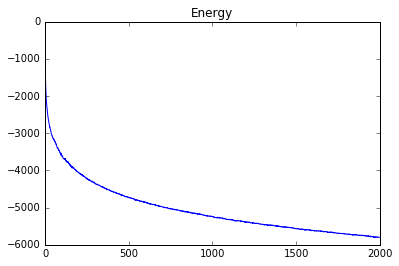

In [11]:
plt.plot(range(len(energies)), energies)
plt.title("Energy")

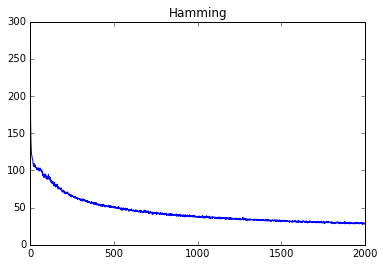

In [12]:
plt.plot(range(len(scores)), scores)
plt.title("Hamming")

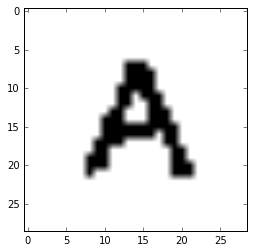

In [19]:
test_s = test_x[1]

plt.imshow(test_s.reshape((29,29)), cmap="gray")

In [20]:
import matplotlib.gridspec as gridspec

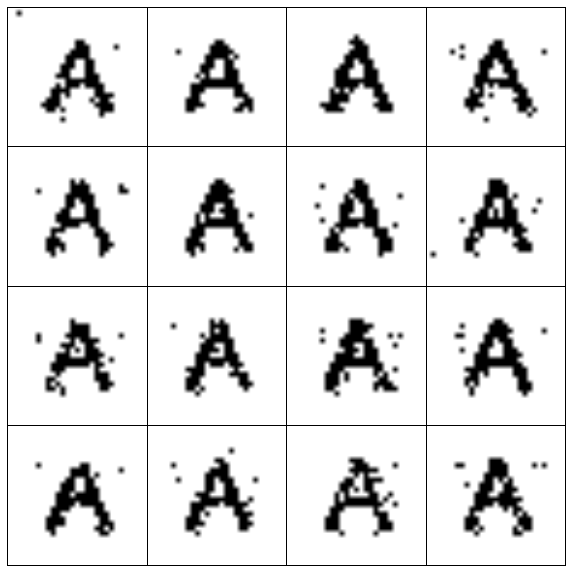

In [21]:
fig = plt.figure(figsize=(10, 10))

grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)
for i in range(16):
    ax = plt.Subplot(fig, grid[i])
    
    vis = sample(rbm.visible_step(rbm.hidden_step(test_s)))
    ax.imshow(vis.reshape((29,29)), cmap="gray")
    ax.set_xticks([]);ax.set_yticks([])
    fig.add_subplot(ax)